In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r'C:\Users\rohit\OneDrive\Desktop\Machine learning\50_Startups (1).csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [4]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['State']=lb.fit_transform(df['State'])
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


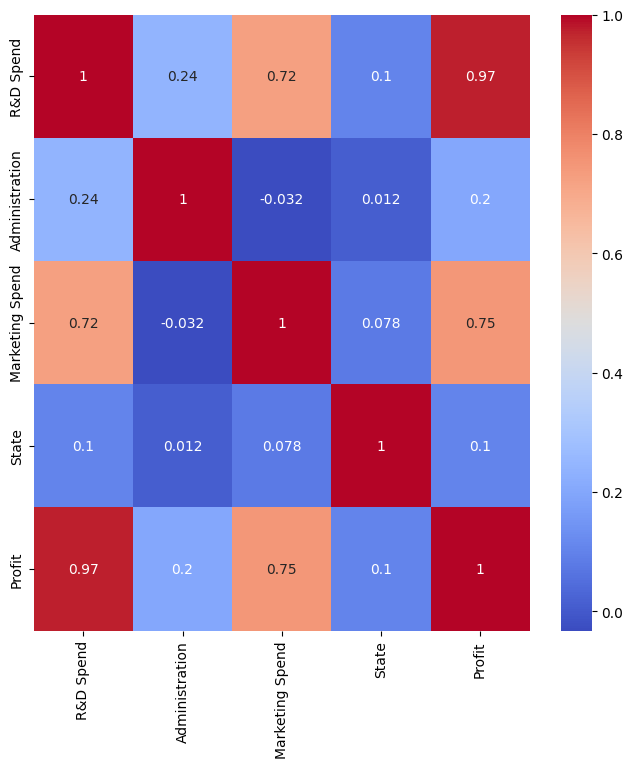

In [99]:
# Correlation Matrix
plt.figure(figsize=(8, 8))  # Set width and height
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.show()

In [100]:
X=df.iloc[:,0:4]
Y=df.iloc[:,-1]
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [101]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [103]:
X_train,X_test

(array([[-0.35006454, -0.78547109,  0.1011968 ,  0.05783149],
        [-0.55530319, -1.48117426,  0.02734979,  1.21446136],
        [ 0.07935762,  0.80133381, -0.55152132,  0.05783149],
        [-0.54638238,  1.32505817,  0.07011684, -1.09879837],
        [ 0.43485371, -0.35598663,  0.75148516,  0.05783149],
        [ 1.26943143,  0.85518519,  0.98603118,  0.05783149],
        [ 1.04525007,  1.28077047,  0.4404    ,  0.05783149],
        [-1.529843  ,  0.02942065, -1.6218751 ,  1.21446136],
        [-1.53976251, -2.76767264, -1.6372965 ,  1.21446136],
        [-0.13115188,  1.14497701, -0.76949991,  1.21446136],
        [ 0.92791613, -0.02992062,  0.48303162,  1.21446136],
        [-0.20932933, -0.2993768 , -0.89915412,  0.05783149],
        [-0.17870828,  0.2251352 , -1.26401642, -1.09879837],
        [ 0.1374709 , -0.06929437,  0.50384666, -1.09879837],
        [-1.03967624, -1.05076697, -0.43852106, -1.09879837],
        [ 0.09938348, -0.36790317,  0.781818  , -1.09879837],
        

In [104]:
from sklearn.linear_model import LinearRegression
Lr=LinearRegression()
Lr.fit(x_train,Y_train)

LinearRegression()

In [105]:
Y_pred=Lr.predict(X_test)
Y_pred

array([103959.40508021, 132398.73236694, 133529.03790148,  72958.28368314,
       179534.78737166, 115533.62584099,  67476.95847883,  98504.36199396,
       114789.16083781, 168972.21909945])

In [106]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(mean_squared_error(Y_test,Y_pred))
print(mean_absolute_error(Y_test,Y_pred))
print(r2_score(Y_test,Y_pred))

78413822.17201355
7400.616305036968
0.9386861070938132
